In [1]:
# Importing requird python packages
# Path to hsmpy package
HSMPY_PATH = r'\\CHCFPP01\Guest\MRajabi\Python Scripts'
import sys, os, arcpy, csv, json, math
sys.path.append(HSMPY_PATH)
import hsmpy3
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from IPython.display import Image
from IPython.core.display import HTML 
import subprocess 
import webbrowser
import time
import copy
import shutil
from time import gmtime, strftime
print(strftime("%Y-%m-%d %H:%M:%S"))

2019-02-07 11:25:26


In [6]:
# Defining Parameteres
print(strftime("%Y-%m-%d %H:%M:%S"))
Project_DIR  = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool'
Cleaned_Dir  = Project_DIR + '\\14.CleanedUp_Data'
Const_Int  = Cleaned_Dir + '\\Cont_Int.shp'
Const_Seg  = Cleaned_Dir + '\\Cont_Seg.shp'

2019-02-07 12:27:31


In [7]:
hsmpy3.common.PrintSummary(Cleaned_Dir + '\\Cont_Int.shp')
hsmpy3.common.PrintSummary(Cleaned_Dir + '\\Cont_Seg.shp')

Type: Point
Columns: 3 x Rows: 549
['ContNum', 'FID', 'Shape']
Type: Polyline
Columns: 6 x Rows: 1863
['ContNum', 'FID', 'I_RID', 'Shape', 'Shape_Leng', 'SiteID']


{'Columns': ['ContNum', 'FID', 'I_RID', 'Shape', 'Shape_Leng', 'SiteID'],
 'Rows': 1863,
 'ShapeType': 'Polyline'}

In [8]:
# Reading Contracts Info
print(strftime("%Y-%m-%d %H:%M:%S"))
#Cont_DF = pd.concat([hsmpy3.common.FCtoDF(fc,readGeometry=True) for fc in [HSIP_Int,HSIP_Seg]])
HSIP_DF = pd.read_csv  (Cleaned_Dir + '\\01.HSIP_Data.csv')
HSIP_DF.index = HSIP_DF.HSIPID.astype(str)

Cont_DF = pd.read_excel(Cleaned_Dir + '\\03.Contracts_Data.xlsx',index_col=0)

Pay_DF  = pd.read_csv  (Cleaned_Dir + '\\05.Contract_PayItems.csv')
Pay_DF.index = pd.MultiIndex.from_arrays([Pay_DF.ContNum,Pay_DF.PayItem])

2019-02-07 12:29:40


In [14]:
Seg_DF = hsmpy3.common.FCtoDF(Const_Seg,readGeometry=True)
Int_DF = hsmpy3.common.FCtoDF(Const_Int,readGeometry=True)
Seg_DF.Shape_Leng = Seg_DF.Shape.apply(lambda x:x.length/5280.0)
Cont_DF['NumSeg'] = Seg_DF.groupby('ContNum').Shape.count().loc[Cont_DF.index].fillna(0).astype(int)
Cont_DF['SegMileage'] = Seg_DF.groupby('ContNum').Shape_Leng.sum().loc[Cont_DF.index].fillna(0.0).astype(float)
Cont_DF['NumInt'] = Int_DF.groupby('ContNum').Shape.count().loc[Cont_DF.index].fillna(0).astype(int)
Cont_DF['IsGeocoded'] = Cont_DF.apply(lambda row:'Yes' if row.NumSeg>0 or row.NumInt>0 else 'No',axis=1)
Cont_DF.to_csv(Cleaned_Dir + '\\03.Contracts_Data.csv')

In [40]:
HSIP_Att = [f for f in os.listdir(r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool\7.ReceivedData\Attachments')]
HSIP_DF.index = HSIP_DF.HSIPID.astype(str)
HSIP_DF['HasAttachment'] = pd.Series(index=HSIP_Att,data='Yes').loc[HSIP_DF.index].fillna('No')
HSIP_DF.to_csv (Cleaned_Dir + '\\01.HSIP_Data.csv')

In [35]:
Cont_Att = [f for f in os.listdir(r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool\7.ReceivedData\Attachments')]

HSIP_DF['HasAttachment'] = pd.Series(index=HSIP_Att,data='Yes').loc[HSIP_DF.index].fillna('No')


,HSIPID,FedHSIPID,StateJobNum,ContNums,FiscalYear,District,IsLocal,IsSystemic,TargetCrashType,EmphasisArea,ApprAmnt,AllSelectedImprovements,ProposedImprovements-Eng,RuralOrUrban,Problem Description,Location Description,Approved Scope
0,201112004,5855003,C-92-066-12,64H66,2012.0,2,False,False,Angle,Intersections,36900,Install Traffic Signals;Install Advance Signal...,Install Advance Signal Warning Signs,false,Drivers are having trouble navigating this unu...,"3 one way legs from Avenue of the Cities, 19th...",Add supplemental signal heads for the SB to EB...
1,201201001,0742135,C-92-026-12,64H65,2012.0,2,False,False,HeadOn;Overturned,RoadDepart,307000,Resurfacing alone;,Resurfacing alone,true,The trees in this segment are preventing the p...,Narrow 2 lane section including a tight curve ...,Resurface with a higher friction co-efficient ...
2,201201002,6578003,C-94-015-12,68A69,2012.0,4,False,False,Turning,Intersections,370000,Improvement/Realignment/Reconstruction;,Improvement/Realignment/Reconstruction,false,Lack of Sight Distance for heavy turning volum...,I-474 and Airport Rd Parclo segment between ra...,"Offset left-tuns, FYA, and skid resistant resu..."
3,201201004,000S874,C-94-009-12,68A66,2012.0,4,False,False,RearEnd;Turning,Intersections,340000,Improvement/Realignment/Reconstruction;,Improvement/Realignment/Reconstruction,false,SB Right-Turn crashes due to approach angle an...,Intersection of US Bus 24 / Il 8 (Washington R...,Reconstruct angle of right-turn approach and s...
4,201201006,NaN,C-98-008-12,LA812;LA811;76F19;LAV8I;LA813,2012.0,8,False,False,FixedObj;RearEnd,DrBehavAwar;RoadDepart,1915200,Lane Addition;Add or Widen Paved Shoulder;Rumb...,Rumble strips,true,Fixed Object and Rear End Crashes,IL 111 from Madison Co. Line to Oak Rest Lane,Installation of a continuous Left Turn Lane wi...
5,201201007,310148,C-98-005-12,76F16,2012.0,8,False,False,FixedObj;SideSwipeSameDir,RoadDepart,195000,Rumble strips;,Rumble strips,true,IL 255 fromI-270 to IL 143,IL 255 fromI-270 to IL 143,Installation of Shoulder Rumble Strips
6,201202001,0669033,C-94-017-12,68A71,2013.0,4,False,False,RearEnd;Turning,Intersections,850000,Exclusive left-turn lanes;,Exclusive left-turn lanes,true,Stone School Rd connects Farminton Rd with IL ...,East of Cameron Lane and west of Bellevue on I...,Left-turn lane for the 3 intersections closely...
7,201202002,320038,C-97-031-11,74510,2012.0,7,False,False,RearEnd;Turning,DrBehavAwar;Intersections,650000,Improvement/Realignment/Reconstruction;Increas...,Install Traffic Signals,false,East and Westbound Left Turn Lanes are Offset ...,IL 48 (Pershing Rd) @ 22nd Street in Decatur,Correct Offset West and Eastbound Left-Turn La...
8,201202003,NaN,C-98-010-12,LA812;LA811;76F14,2012.0,8,False,False,FixedObj,DrBehavAwar;RoadDepart,1176000,Rumble strips;Add or Widen Paved Shoulder;Lane...,Lane Addition,true,Rural X-section with no shoulders,IL 3 from Stanka Ln. to Piasa Creek,Installation of 4' Bit. / 4' Agg. Safety Shoul...
9,201202004,NaN,NaN,68B08,2017.0,4,False,False,RearEnd;Turning,DrBehavAwar;Intersections;RoadDepart,2544000,Provide TWLTL;Add or Widen Paved Shoulder;Rumb...,Flattened slopes,true,Severe rear end crashes resulting from vehic...,"East side of Hanna City, multiple driveway acc...","Roadway widening with TWLTL, 8 ft paved should..."


In [5]:
# Read the results of Contract locations
Cont_Crash_DF = pd.read_csv('Cont_Crashes.csv')
Cont_Crash_DF.index = pd.MultiIndex.from_arrays([Cont_Crash_DF.ContNum,Cont_Crash_DF.Period,Cont_Crash_DF.CID])

Loc_DF = pd.read_csv('Contracts_IRIS_Crashes.csv')
idx1 = pd.Index(Loc_DF.INVENTORY)
idx2 = pd.IntervalIndex.from_tuples([(bmp,emp) for bmp,emp in zip(Loc_DF.BEG_STA,Loc_DF.END_STA)],'left')
#idx3 = pd.IntervalIndex.from_tuples([(pd.Timestamp(y,1,1),pd.Timestamp(y+1,1,1)) for y in Loc_DF.YEAR],'left')
#Loc_DF.index = pd.MultiIndex.from_arrays([idx1,idx2,idx3],names = ['INVENTORY','Milepost','Dates'])
Loc_DF.index = pd.MultiIndex.from_arrays([Loc_DF.INVENTORY,idx2,Loc_DF.YEAR],names = ['INVENTORY','Milepost','Year'])
Loc_DF = Loc_DF.sort_index()
Loc_DF.CID = Loc_DF.CID.fillna('')
Loc_DF.CID = Loc_DF.CID.apply(lambda x:[int(i) for i in x.split(';') if len(i)>0])
Loc_DF

INVENTORY  \
INVENTORY         Milepost                                 Year                      
001  01040 003345 [0.9426515151567538, 0.99)               2011  001  01040 003345   
                                                           2012  001  01040 003345   
                                                           2013  001  01040 003345   
                                                           2014  001  01040 003345   
                                                           2015  001  01040 003345   
                                                           2016  001  01040 003345   
001  10172 401950 [0.0, 0.52)                              2015  001  10172 401950   
                                                           2016  001  10172 401950   
                  [0.0, 0.5399999999935972)                2005  001  10172 401950   
                                                           2006  001  10172 401950   
                                                           2007  001  10172 401950   
                                                           2008  001  10172 401950   
                                                           2009  001  10172 401950   
                                                           2010  001  10172 401950   
                                                           2011  001  10172 401950   
                                                           2012  001  10172 401950   
                                                           2013  001  10172 401950   
                                                           2014  001  10172 401950   
001  10172 402350 [0.0, 0.5)                               2005  001  10172 402350   
                                                           2006  001  10172 402350   
                                                           2007  001  10172 402350   
                                                           2008  001  10172 402350   
                                                           2009  001  10172 402350   
                                                           2010  001  10172 402350   
                                                           2011  001  10172 402350   
                                                           2012  001  10172 402350   
                                                           2013  001  10172 402350   
                                                           2014  001  10172 402350   
                                                           2015  001  10172 402350   
                                                           2016  001  10172 402350   
...                                                                            ...   
102  32466 000000 [5.735400000005028, 5.840400000000955)   2008  102  32466 000000   
                                                           2009  102  32466 000000   
                  [5.735799999994924, 5.8408999999956)     2015  102  32466 000000   
                                                           2016  102  32466 000000   
                  [5.750199999994947, 5.832800000003773)   2005  102  32466 000000   
                                                           2006  102  32466 000000   
102  50003 000000 [4.035699999993085, 4.179999999993015)   2005  102  50003 000000   
                                                           2006  102  50003 000000   
                  [4.059299999993527, 4.174700000003213)   2007  102  50003 000000   
                                                           2008  102  50003 000000   
                                                           2009  102  50003 000000   
                                                           2010  102  50003 000000   
                                                           2011  102  50003 000000   
                                                           2012  102  50003 000000   
                               

In [21]:
#Aggregated Results
print(strftime("%Y-%m-%d %H:%M:%S"))
for per in ['Before','After']:
    for sev in ['K','A','B']:
        for met in ['OC','EC']:
            Cont_DF['_'.join([per[0],sev,met])] = 0.0
Cont_DF['EUAC'] = 0.0
Cont_DF['EUAB_OC'] = 0.0
Cont_DF['EUAB_EC'] = 0.0
Cont_DF['BC_OC'] = 0.0
Cont_DF['BC_EC'] = 0.0
XLSPath = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool\4.Contracts_AnalysisFiles'
XLSList = [os.path.join(XLSPath, f) for f in os.listdir(XLSPath) if os.path.isfile(os.path.join(XLSPath, f)) and f.split('.')[1]=='xlsx' and 'HSIP_' in f.split('.')[0]]
f = FloatProgress(min=0, max=len(XLSList))
display(f)
for xls in XLSList:
    p = str(os.path.basename(xls).split('_')[1].split('.')[0])
    df10 = pd.read_excel(xls,'BCSummary')
    df10.index = df10.Period
    #display(df10)
    for per in ['Before','ServiceLife']:
        if per=='ServiceLife':
            per='AfterPeriod'
        for sev in ['K','A','B']:
            for met in ['OC','EC']:
                try:
                    Cont_DF.set_value(p,'_'.join([per[0],sev,met]),df10.loc[per]['_'.join([sev,met])].item())
                except:pass
    for c in ['EUAC','EUAB_OC','EUAB_EC','BC_OC','BC_EC']:
        try:
            Cont_DF.set_value(p,c,df10.loc['ServiceLife'][c].item())
        except:pass
    f.value += 1
Cont_DF.to_excel(Project_DIR+'\\5.Documents\\Cont_DF_Sorted1.xlsx')
print(strftime("%Y-%m-%d %H:%M:%S"))

2018-09-06 12:16:54


FloatProgress(value=0.0, max=328.0)

2018-09-06 12:20:13


In [22]:
print(strftime("%Y-%m-%d %H:%M:%S"))
c = []
for per in ['Before','After']:
    for sev in ['K','A','B']:
        for met in ['OC','EC']:
            c.append('_'.join([per[0],sev,met]))
c.extend(['EUAC','EUAB_OC','EUAB_EC','BC_OC','BC_EC'])
df = Cont_DF[Cont_DF.EUAC>0][c]
df.sort_values('BC_OC')
display(df)

2018-09-06 12:20:13


,B_K_OC,B_K_EC,B_A_OC,B_A_EC,B_B_OC,B_B_EC,A_K_OC,A_K_EC,A_A_OC,A_A_EC,A_B_OC,A_B_EC,EUAC,EUAB_OC,EUAB_EC,BC_OC,BC_EC
99363,0.111111,3.853981e-02,1.333333,0.365020,1.777778,0.983113,0.0,0.0,0.0,0.0,0.0,0.0,3.864882e+06,1.857590e+07,9.765876e+05,4.806331,0.252682
66E35,0.000000,1.586040e-01,0.500000,0.678340,0.500000,1.040863,0.0,0.0,0.0,0.0,0.0,0.0,4.483125e+05,1.600815e+06,-1.605293e+05,3.570757,-0.358075
78457,1.200000,2.563148e+00,12.700000,14.457968,12.900000,23.121982,0.0,0.0,0.0,0.0,0.0,0.0,1.615776e+06,1.423666e+08,4.869342e+07,88.110345,30.136234
66C33,0.100000,7.375766e-04,0.300000,0.003526,0.500000,0.059871,0.0,0.0,0.0,0.0,0.0,0.0,5.813277e+05,1.180604e+07,-8.013385e+05,20.308755,-1.378463
66E70,0.300000,8.580832e-01,0.900000,4.007715,3.200000,7.309312,0.0,0.0,0.0,0.0,0.0,0.0,8.489664e+05,2.243171e+07,-6.687897e+06,26.422380,-7.877693
76H78,0.400000,1.150555e+00,3.800000,4.857126,6.600000,8.234339,0.0,0.0,0.0,0.0,0.0,0.0,5.560369e+04,-2.333899e+08,8.436698e+05,-4197.381890,15.172910
99341,0.000000,2.765751e-04,0.200000,0.007387,0.000000,0.006676,0.0,0.0,0.0,0.0,0.0,0.0,1.557715e+05,1.009563e+06,3.140991e+04,6.481050,0.201641
66E71,0.400000,4.996609e-01,0.600000,2.139457,1.700000,3.479477,0.0,0.0,0.0,0.0,0.0,0.0,7.126820e+05,4.364162e+07,1.786983e+05,61.235758,0.250741
70983,0.100000,2.376421e-01,0.600000,1.022841,0.900000,1.689173,0.0,0.0,0.0,0.0,0.0,0.0,9.798057e+05,5.318675e+06,-1.769198e+06,5.428295,-1.805662
66E36,0.100000,1.355733e-01,0.400000,0.582260,0.300000,0.891964,0.0,0.0,0.0,0.0,0.0,0.0,4.658703e+05,1.009540e+07,1.896515e+06,21.669981,4.070908


In [24]:
print(strftime("%Y-%m-%d %H:%M:%S"))
Cont_DF_Eval = Cont_DF[[len(Cont_DF.loc[i]['BeforePeriod'].split(';'))>=2 and
                        len(Cont_DF.loc[i]['AfterPeriod' ].split(';'))>=2 and
                        Cont_DF.loc[i]['CompletionAmount']>0 and not pd.isnull(Cont_DF.loc[i]['CompletionDate']) 
                        for i in Cont_DF.index]]
print('Total Projects with 2y B&A & TAA>0: {}'.format(len(Cont_DF_Eval)))
HSIP_DF_Eval_Prc = Cont_DF_Eval[(Cont_DF_Eval['EUAB_OC']!=0)]
print('Total Projects with 2y B&A & TAA>0 and BC<>0: {}'.format(len(HSIP_DF_Eval_Prc)))
print('Total BC_OC: {}'.format(sum(HSIP_DF_Eval_Prc.EUAB_OC)/sum(HSIP_DF_Eval_Prc.EUAC)))
HSIP_DF_Eval_Prc_EB = HSIP_DF_Eval_Prc[(HSIP_DF_Eval_Prc['EUAB_EC']!=0) & (~pd.isnull(HSIP_DF_Eval_Prc['EUAB_EC']))]
print('Total BC_EC: {}'.format(sum(HSIP_DF_Eval_Prc_EB.EUAB_EC)/sum(HSIP_DF_Eval_Prc_EB.EUAC)))

2018-09-06 12:24:16
Total Projects with 2y B&A & TAA>0: 331
Total Projects with 2y B&A & TAA>0 and BC<>0: 231
Total BC_OC: 8.38842369943904
Total BC_EC: 1.9585871467868103


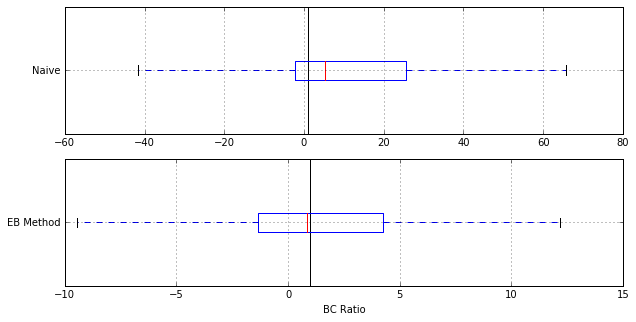

In [25]:
plt.figure(figsize=(10,5))

#plt.gca().set_ylim([-100,100])
df1 = HSIP_DF_Eval_Prc
df2 = HSIP_DF_Eval_Prc_EB

plt.subplot(211)
plt.boxplot(x=df1.BC_OC,showfliers =False,labels=['Naive'],vert=False)
plt.vlines(1,0,2)
#plt.gca().set_ylim([0,3])
#plt.xticks(rotation=45)
#plt.xlabel('BC Ratio')
plt.grid()

plt.subplot(212)
plt.boxplot(x=df2.BC_EC,showfliers =False,labels=['EB Method'],vert=False)
plt.vlines(1,0,2)
#plt.gca().set_xlim([0,3])
#plt.xticks(rotation=45)
plt.xlabel('BC Ratio')
plt.grid()

OutPath = r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool\5.Documents'
FN = OutPath + '\\Statewide.png'
plt.savefig(FN,transparent=True)
plt.show()

2018-09-06 12:25:02


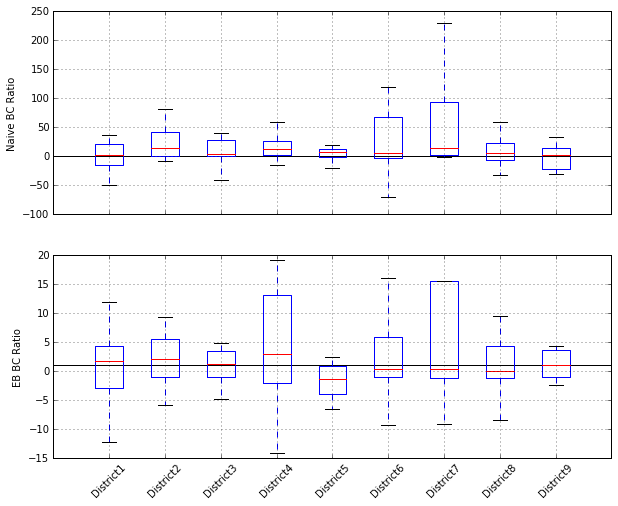

,Tot,Completed,Tot.Awrd.Amount,3Ys BA,Proc_OC,Proc_OC_BC>1,EUAC_OC,EUAB_OC,BC_OC,Proc_EC,Proc_EC_BC>1,EUAC_EC,EUAB_EC,BC_EC,HSIP_ID_OC,HSIP_ID_EC
District1,267.00,113.00,88329382.94,72.00,45.00,25.00,33014216.46,-62969029.79,-1.91,31.00,17.00,24519357.58,34874676.04,1.42,60W98;60V59;60X32;60T98;60W05;60T80;63821;60T8...,60W98;60V59;60X32;60T98;60W05;60T80;60T88;60T8...
District2,76.00,43.00,26236112.13,25.00,24.00,17.00,13883413.95,195009605.36,14.05,20.00,13.00,12448417.01,16215557.35,1.30,64G97;64H66;64H65;64E69;64C68;64F52;64G16;64F3...,64G97;64H66;64H65;64E69;64C68;64F52;64G16;64F3...
District3,72.00,48.00,48134764.37,17.00,25.00,15.00,22765769.61,182551294.09,8.02,22.00,11.00,21813601.84,16966463.87,0.78,66D33;66D83;66D84;66B79;66D37;66D32;66D36;66C1...,66D33;66D83;66D84;66B79;66D37;66D32;66D36;66C1...
District4,80.00,36.00,33142421.44,22.00,19.00,15.00,9188065.97,109455174.32,11.91,17.00,10.00,8193481.84,70206486.77,8.57,68B68;68A71;68A66;68A98;89591;68A49;68993;6899...,68B68;68A71;68A66;68A98;68A49;68993;68992;6881...
District5,64.00,29.00,38559562.70,14.00,15.00,9.00,22727049.05,87677187.42,3.86,10.00,2.00,18434656.57,43138566.65,2.34,70A52;70A25;70967;70968;91481;70966;91467;7095...,70A25;70967;70968;70966;91467;70956;70927;7088...
District6,111.00,53.00,38994324.57,34.00,31.00,17.00,11321360.69,323550338.21,28.58,28.00,11.00,10290687.48,19961596.88,1.94,93609;72F31;72F50;72G04;72F06;72F24;72F13;72D6...,93609;72F31;72F50;72G04;72F24;72F13;72D65;72D6...
District7,43.00,20.00,15146158.02,7.00,11.00,8.00,7958515.64,93943293.55,11.80,9.00,4.00,5548838.48,3053746.87,0.55,74610;74510;74422;74444;74447;74445;74446;7442...,74510;74422;74444;74447;74445;74446;95506;7420...
District8,118.00,50.00,36463375.82,36.00,43.00,25.00,30139176.53,399724895.95,13.26,41.00,19.00,29726959.07,61602681.31,2.07,76F76;76G70;97542;76F92;76G68;76G67;76E53;76G1...,76F76;76G70;97542;76F92;76G68;76G67;76E53;76G1...
District9,72.00,28.00,30010117.30,15.00,18.00,11.00,15195459.22,65154768.20,4.29,18.00,9.00,15195459.22,20269765.28,1.33,78395;78407;78362;99495;78352;78116;78098;7805...,78395;78407;78362;99495;78352;78116;78098;7805...
Total,903.00,420.00,355016219.29,242.00,231.00,142.00,166193027.11,1394097527.32,8.39,196.00,96.00,146171459.09,286289541.01,1.96,0.00,0.00


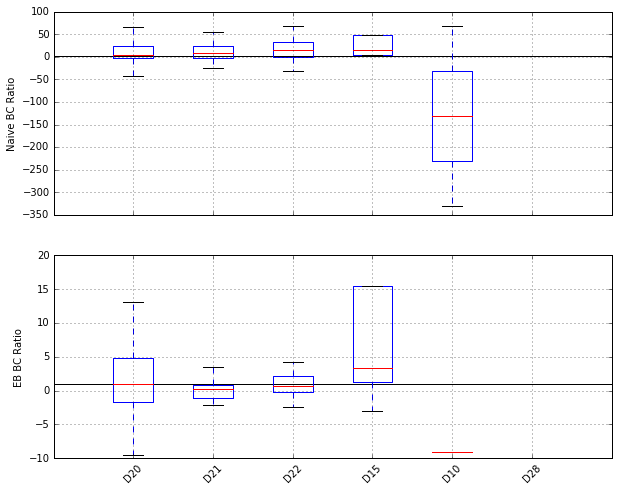

,Tot,W Tot Award,Tot.Awrd.Amount,3Ys BA,Proc_OC,Proc_OC_BC>1,EUAC_OC,EUAB_OC,BC_OC,Proc_EC,Proc_EC_BC>1,EUAC_EC,EUAB_EC,BC_EC,HSIP_ID_OC,HSIP_ID_EC
D20,556.00,389.00,393589285.59,265.00,189.00,112.00,143563964.10,1086081503.44,7.57,169.00,84.00,129508059.66,268742248.30,2.08,66D33;66D83;66D84;60W98;78395;76F76;60V59;66B7...,66D33;66D83;66D84;60W98;78395;76F76;60V59;66B7...
D21,152.00,54.00,46457537.85,38.00,21.00,14.00,12229241.89,139668434.23,11.42,9.00,2.00,6728031.98,3812670.77,0.57,97542;63821;91481;99495;91467;63669;87514;6368...,97542;99495;91467;87514;89561;91393;99413;8541...
D22,54.00,25.00,20056140.09,20.00,14.00,10.00,9010342.81,132398760.73,14.69,12.00,6.00,8661038.03,9110912.82,1.05,93609;97519;89591;87479;97462;99443;99366;9349...,93609;97519;87479;97462;99443;99366;99369;9347...
D15,5.00,5.00,1175774.33,5.00,5.00,5.00,1229567.95,42806614.17,34.81,5.00,4.00,1229567.95,5032926.69,4.09,68993;76E33;76D38;74445;74446,68993;76E33;76D38;74445;74446
D10,4.00,4.00,551795.70,3.00,2.00,1.00,159910.37,-6857785.25,-42.89,1.00,0.00,44761.48,-409217.57,-9.14,85412;95506,95506
D28,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
Total,774.00,477.00,461830533.56,331.00,231.00,142.00,166193027.11,1394097527.32,8.39,196.00,96.00,146171459.09,286289541.01,1.96,0.00,0.00


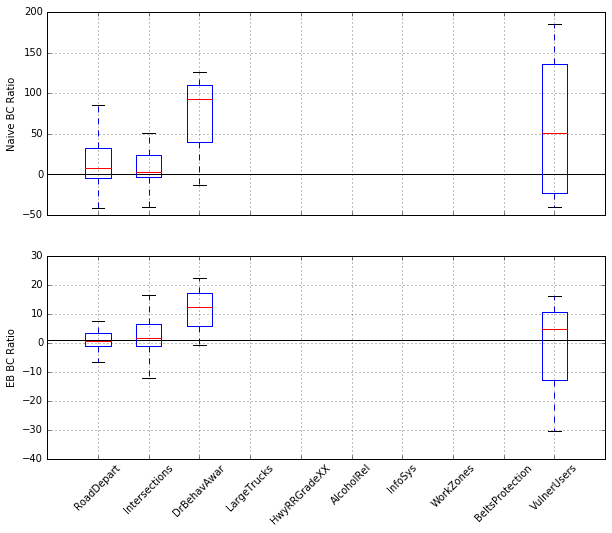

,Tot,W Tot Award,Tot.Awrd.Amount,3Ys BA,Proc_OC,Proc_OC_BC>1,EUAC_OC,EUAB_OC,BC_OC,Proc_EC,Proc_EC_BC>1,EUAC_EC,EUAB_EC,BC_EC,HSIP_ID_OC,HSIP_ID_EC
RoadDepart,353.00,193.00,197321700.57,143.00,94.00,59.00,86776388.09,970039927.81,11.18,90.00,41.00,82869410.63,215983047.62,2.61,66D33;66D83;66D84;66B79;68B68;66D37;70A52;66D3...,66D33;66D83;66D84;66B79;68B68;66D37;66D32;66D3...
Intersections,315.00,142.00,105481821.90,119.00,92.00,53.00,53119920.76,172928214.60,3.26,77.00,45.00,45174599.04,70737197.74,1.57,93609;60W98;76F76;60X32;76G70;60T98;97542;7840...,68B32;93609;60W98;76F76;60X32;76G70;60T98;9754...
DrBehavAwar,27.00,8.00,3218919.26,7.00,3.00,2.00,845413.12,45318556.62,53.61,3.00,2.00,845413.12,7453755.40,8.82,60T14;89561;76A28,60T14;89561;76A28
LargeTrucks,2.00,1.00,2184819.53,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
HwyRRGradeXX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
AlcoholRel,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
InfoSys,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
WorkZones,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
BeltsProtection,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,
VulnerUsers,13.00,7.00,3462618.23,7.00,4.00,2.00,2886879.28,-41749146.75,-14.46,3.00,2.00,2735773.27,14759681.91,5.40,72F31;60F82;72C46;60F81,72F31;60F82;72C46


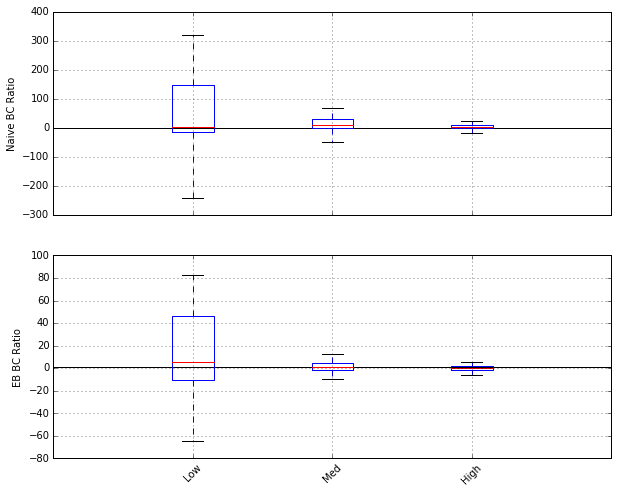

,Tot,W Tot Award,Tot.Awrd.Amount,3Ys BA,Proc_OC,Proc_OC_BC>1,EUAC_OC,EUAB_OC,BC_OC,Proc_EC,Proc_EC_BC>1,EUAC_EC,EUAB_EC,BC_EC,HSIP_ID_OC,HSIP_ID_EC
Low,487.00,57.00,3029116.25,48.00,37.00,21.00,1822438.60,115193679.71,63.21,32.00,19.00,1621354.48,32562690.32,20.08,72F31;78407;72G04;60V95;78352;76F98;66C47;72F0...,72F31;78407;72G04;60V95;78352;76F98;66C47;72F1...
Med,273.00,249.00,115384090.74,206.00,133.00,87.00,63617932.32,1052091907.83,16.54,114.00,58.00,54393516.99,235801948.34,4.34,66D83;66D84;60W98;76F76;60V59;66B79;60X32;76G7...,68B32;66D83;66D84;60W98;76F76;60V59;66B79;60X3...
High,145.00,114.00,236603012.30,77.00,61.00,34.00,100752656.20,226811939.78,2.25,58.00,19.00,95552986.64,13598546.18,0.14,66D33;93609;78395;70A52;66D36;74610;72F50;76F9...,66D33;93609;78395;66D36;72F50;76F92;64G97;6382...
Total,905.00,420.00,355016219.29,331.00,231.00,142.00,166193027.11,1394097527.32,8.39,204.00,96.00,151567858.12,281963184.84,1.86,0.00,0.00


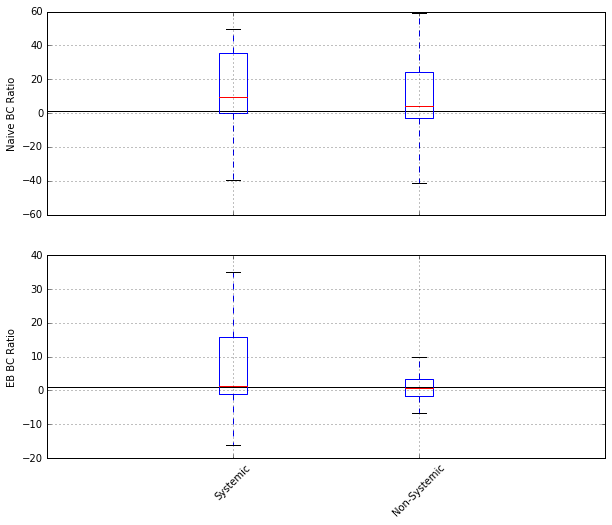

,Tot,W Tot Award,Tot.Awrd.Amount,3Ys BA,Proc_OC,Proc_OC_BC>1,EUAC_OC,EUAB_OC,BC_OC,Proc_EC,Proc_EC_BC>1,EUAC_EC,EUAB_EC,BC_EC,HSIP_ID_OC,HSIP_ID_EC
Systemic,203.00,98.00,78473230.98,86.00,51.00,35.00,48737320.73,705319489.83,14.47,50.00,26.00,48076103.26,195302628.42,4.06,68B68;72F50;78407;78362;76E53;70968;91467;7835...,68B32;68B68;72F50;78407;78362;76E53;70968;9146...
Non-Systemic,702.00,322.00,276542988.31,245.00,180.00,107.00,117455706.38,688778037.49,5.86,154.00,70.00,103491754.86,86660556.42,0.84,66D33;66D83;93609;66D84;60W98;78395;76F76;60V5...,66D33;66D83;93609;66D84;60W98;78395;76F76;60V5...
Total,905.00,420.00,355016219.29,331.00,231.00,142.00,166193027.11,1394097527.32,8.39,204.00,96.00,151567858.12,281963184.84,1.86,0.00,0.00


2018-09-06 12:25:29


In [26]:
print(strftime("%Y-%m-%d %H:%M:%S"))
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Dist_Agg_DF   = hsmpy3.il.HSIP_Aggr_District  (Cont_DF,DocumentsDir, 'Agg_District'  );display(Dist_Agg_DF)
FundS_Aggr_DF = hsmpy3.il.HSIP_Aggr_FundSource(Cont_DF,DocumentsDir, 'Agg_FundSource');display(FundS_Aggr_DF)
EA_Aggr_DF    = hsmpy3.il.HSIP_Aggr_EA        (Cont_DF,DocumentsDir, 'Agg_EA'        );display(EA_Aggr_DF)
CostC_Aggr_DF = hsmpy3.il.HSIP_Aggr_Cost      (Cont_DF,DocumentsDir, 'Agg_CostCat'   );display(CostC_Aggr_DF)
Sys_Aggr_DF   = hsmpy3.il.HSIP_Aggr_Systemic  (Cont_DF,DocumentsDir, 'Agg_Systemic'  );display(Sys_Aggr_DF)
print(strftime("%Y-%m-%d %H:%M:%S"))

In [21]:
for i in range(0,16):
    display(pd.DataFrame(XML_DF['ProposedImp-Eng-{}'.format(i)].value_counts()))


,ProposedImp-Eng-0
,663
None,251
Other Improvement,123


,ProposedImp-Eng-1
,770
None,265
Improve access management near intersections.,2


,ProposedImp-Eng-2
,767
None,265
Utilize ITS technology to provide accurate queuing information.,2
Pursue use of ITS or use of detectors and message boards to communicate congested areas and back up occurrences to truck drivers.,2
Evaluate the use of Intelligent Transportation Systems (ITS) to alert traffic of errant vehicles.,1


,ProposedImp-Eng-3
,770
None,267


,ProposedImp-Eng-4
,681
None,235
Improvement/Realignment/Reconstruction,62
Exclusive left-turn lanes,28
"Use alternative designs, such a roundabouts, for intersection improvements.",12
Implement offset left turns at signalized intersections.,10
Improve sight distance at intersection approaches.,9


,ProposedImp-Eng-5
,758
None,261
Enhance roadway lighting,7
Roadway lighting,6
Safety Lighting,3
Increase lighting at high-crash locations.,2


,ProposedImp-Eng-6
,708
None,242
Increase Width of Paved Shoulder,23
Widening and Resurfacing or Widening alone,14
Rumble Strips (Transverse),13
Add Right Turn Lane on One Approach,8
Resurfacing alone,8
DeSlick (formerly known as skidproofing),6
Lane Addition,5
Add Left Turn Lane (ThreeLeg Intersection),4


,ProposedImp-Eng-7
,677
None,234
Rumble strips,52
Shoulder rumble strips and stripes,21
Raised pavement markings,8
Centerline rumble strips and stripes,7
Improve pedestrian signing and pavement markings.,6
Install milled-in rumble strips to both shoulders of Interstate roadways.,6
Innovative pavement marking and signing,5
Place Edgeline and Centerline Markings,4


,ProposedImp-Eng-8
,769
None,267
Automatic Railroad Gates (Crossings w/o Lights and Sounds),1


,ProposedImp-Eng-9
,658
None,216
Guardrail,88
Impact Attenuators,21
Fixed object removal and relocation,13
"Traffic barriers (guardrail, median barriers, bridge railing and crash cushions)",12
Installation of cable median barrier and Nucor cable.,8
Install only new guardrail end sections that pass NCHRP 350 crash testing requirements.,7
Flattened slopes,6
NCHRP 350 crash tested devices,5


,ProposedImp-Eng-10
,757
None,260
Improve roadway geometrics and channelization,10
"Include additional sidewalks in roadway improvements, particularly for urban/suburban areas.",4
Expand and maintain roadway visibility features.,2
Alignments meeting minimum design speeds,2
Adequate clear zones,1
Barrier protections of fixed objects,1


,ProposedImp-Eng-11
,627
None,221
Install Traffic Signals,42
LED signals,31
Add Mast Arms and Signal Head per Lane,30
Countdown pedestrian crosswalk signals,18
Add Left Turn Phase on One Approach (Permissive or Perm/Prot > Protected),12
Implementation of protected left-turn phasing at intersections with a history of left-turning and angle crashes should be retained.,10
Flashing Beacon,9
Traffic Signal Modernization,9


,ProposedImp-Eng-12
,702
None,248
Upgrade Signs to conform with MUTCD,30
Advance Warning with Flasher,13
Chevrons or delineators,9
Install Advance Signal Warning Signs,8
Implement dynamic flashing beacons.,5
Install Advance Signal Warning with Flashers,4
Delineators,4
Speed Signing,4


,ProposedImp-Eng-13
,762
None,260
Install Chevron Signs on Horizontal Curves,3
DeSlick (formerly known as skidproofing),3
Install Post Mounted Delineators,2
Install Advanced Curve Speed/Warning Sign,2
Improve Superelevation on Curve,2
Modify Horizontal Curve Radius and Length w/o Spiral Transitions,2
Guardrail,1


,ProposedImp-Eng-14
,745
None,264
Install Cable Median Barrier (All Crashes),19
Install Median Barrier (General),4
Provide a Raised Median,3
Install Cable Median Barrier (Crash Specific),2


,ProposedImp-Eng-15
,730
None,248
Add or Widen Paved Shoulder,32
Modify Shoulder Type,11
DeSlick (formerly known as skidproofing),5
Provide TWLTL,4
Resurfacing alone,3
Modify Lane Width,3
Add Lanes by Narrowing Existing Lanes,1


In [23]:
for i in [ 'ProposedImp',
 'ProposedImp-Eng-0',
 'ProposedImp-Eng-1',
 'ProposedImp-Eng-10',
 'ProposedImp-Eng-11',
 'ProposedImp-Eng-12',
 'ProposedImp-Eng-13',
 'ProposedImp-Eng-14',
 'ProposedImp-Eng-15',
 'ProposedImp-Eng-2',
 'ProposedImp-Eng-3',
 'ProposedImp-Eng-4',
 'ProposedImp-Eng-5',
 'ProposedImp-Eng-6',
 'ProposedImp-Eng-7',
 'ProposedImp-Eng-8',
 'ProposedImp-Eng-9',
 'ProposedImpCheck',
 'ProposedImprovements-EMS',
 'ProposedImprovements-Edu',
 'ProposedImprovements-Enf',
 'ProposedImprovements-Eng',
 'ProposedImprovementsDescription',
 'ProposedImps-EMS',
 'ProposedImps-Edu',
 'ProposedImps-Enf',
 'ProposedImps-Eng',
 'ProposedProjectInformation',]:
    display(pd.DataFrame(XML_DF[i].value_counts()))

,ProposedImp
,1026
None,11


,ProposedImp-Eng-0
,663
None,251
Other Improvement,123


,ProposedImp-Eng-1
,770
None,265
Improve access management near intersections.,2


,ProposedImp-Eng-10
,757
None,260
Improve roadway geometrics and channelization,10
"Include additional sidewalks in roadway improvements, particularly for urban/suburban areas.",4
Expand and maintain roadway visibility features.,2
Alignments meeting minimum design speeds,2
Adequate clear zones,1
Barrier protections of fixed objects,1


,ProposedImp-Eng-11
,627
None,221
Install Traffic Signals,42
LED signals,31
Add Mast Arms and Signal Head per Lane,30
Countdown pedestrian crosswalk signals,18
Add Left Turn Phase on One Approach (Permissive or Perm/Prot > Protected),12
Implementation of protected left-turn phasing at intersections with a history of left-turning and angle crashes should be retained.,10
Flashing Beacon,9
Traffic Signal Modernization,9


,ProposedImp-Eng-12
,702
None,248
Upgrade Signs to conform with MUTCD,30
Advance Warning with Flasher,13
Chevrons or delineators,9
Install Advance Signal Warning Signs,8
Implement dynamic flashing beacons.,5
Install Advance Signal Warning with Flashers,4
Delineators,4
Speed Signing,4


,ProposedImp-Eng-13
,762
None,260
Install Chevron Signs on Horizontal Curves,3
DeSlick (formerly known as skidproofing),3
Install Post Mounted Delineators,2
Install Advanced Curve Speed/Warning Sign,2
Improve Superelevation on Curve,2
Modify Horizontal Curve Radius and Length w/o Spiral Transitions,2
Guardrail,1


,ProposedImp-Eng-14
,745
None,264
Install Cable Median Barrier (All Crashes),19
Install Median Barrier (General),4
Provide a Raised Median,3
Install Cable Median Barrier (Crash Specific),2


,ProposedImp-Eng-15
,730
None,248
Add or Widen Paved Shoulder,32
Modify Shoulder Type,11
DeSlick (formerly known as skidproofing),5
Provide TWLTL,4
Resurfacing alone,3
Modify Lane Width,3
Add Lanes by Narrowing Existing Lanes,1


,ProposedImp-Eng-2
,767
None,265
Utilize ITS technology to provide accurate queuing information.,2
Pursue use of ITS or use of detectors and message boards to communicate congested areas and back up occurrences to truck drivers.,2
Evaluate the use of Intelligent Transportation Systems (ITS) to alert traffic of errant vehicles.,1


,ProposedImp-Eng-3
,770
None,267


,ProposedImp-Eng-4
,681
None,235
Improvement/Realignment/Reconstruction,62
Exclusive left-turn lanes,28
"Use alternative designs, such a roundabouts, for intersection improvements.",12
Implement offset left turns at signalized intersections.,10
Improve sight distance at intersection approaches.,9


,ProposedImp-Eng-5
,758
None,261
Enhance roadway lighting,7
Roadway lighting,6
Safety Lighting,3
Increase lighting at high-crash locations.,2


,ProposedImp-Eng-6
,708
None,242
Increase Width of Paved Shoulder,23
Widening and Resurfacing or Widening alone,14
Rumble Strips (Transverse),13
Add Right Turn Lane on One Approach,8
Resurfacing alone,8
DeSlick (formerly known as skidproofing),6
Lane Addition,5
Add Left Turn Lane (ThreeLeg Intersection),4


,ProposedImp-Eng-7
,677
None,234
Rumble strips,52
Shoulder rumble strips and stripes,21
Raised pavement markings,8
Centerline rumble strips and stripes,7
Improve pedestrian signing and pavement markings.,6
Install milled-in rumble strips to both shoulders of Interstate roadways.,6
Innovative pavement marking and signing,5
Place Edgeline and Centerline Markings,4


,ProposedImp-Eng-8
,769
None,267
Automatic Railroad Gates (Crossings w/o Lights and Sounds),1


,ProposedImp-Eng-9
,658
None,216
Guardrail,88
Impact Attenuators,21
Fixed object removal and relocation,13
"Traffic barriers (guardrail, median barriers, bridge railing and crash cushions)",12
Installation of cable median barrier and Nucor cable.,8
Install only new guardrail end sections that pass NCHRP 350 crash testing requirements.,7
Flattened slopes,6
NCHRP 350 crash tested devices,5


,ProposedImpCheck
*,1037


,ProposedImprovements-EMS
,763
None,274


,ProposedImprovements-Edu
,763
None,274


,ProposedImprovements-Enf
,763
None,274


,ProposedImprovements-Eng
Other Improvement,115
Guardrail,89
Improvement/Realignment/Reconstruction,60
Rumble strips,52
Install Traffic Signals,42
Add or Widen Paved Shoulder,32
LED signals,31
Upgrade Signs to conform with MUTCD,30
Add Mast Arms and Signal Head per Lane,29
Exclusive left-turn lanes,28


,ProposedImprovementsDescription
Proposed locations in attached Excel spreadsheet will be modified in accordance with attached typical details.,8
Countywide sign modernization,7
Proposed work in this area is to remove the existing deteriorated 1' safety shoulder in place and to add 4' of safety shoulder to each side of the road. Shoulder Rumble strips will also be added. Deteriorated and/or missing pavement markings will also be added to the edge line,6
Improve guardrails county wide to conform to IDOT minimum safety requirements,6
See attached Final Action Plan for Guardrail Terminal Project for Proposed Scope.,4
Install cable median barrier,4
4' Safety Shoulders\nRumble Strips,4
Proposed work in this area is to remove the existing deteriorated 1' safety shoulder in place and to add 4' of safety shoulder to each side of the road. Shoulder Rumble strips will also be added. Deteriorated and/or missing pavement markings will also be added to the edge line.,4
Signal modernization/LED's.,3
HMA shoulders and shoulder rumble strips,3


,ProposedImps-EMS
,1026
None,11


,ProposedImps-Edu
,1026
None,11


,ProposedImps-Enf
,1026
None,11


,ProposedImps-Eng
,1013
None,24


,ProposedProjectInformation
,1026
None,11


In [43]:
HSIP_DF_Eval_Prc['NumOfHSIP'] = [len(s.split(';')) for s in HSIP_DF_Eval_Prc.HSIPIDs]
HSIP_DF_Eval_Prc.NumOfHSIP.value_counts()

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


1    197
2      3
Name: NumOfHSIP, dtype: int64

In [162]:
Cont_DF['NumOfHSIP'] = [len(s.split(';')) for s in Cont_DF.HSIPIDs]
NumOfJoinedCont = []
NumOfCompJoinedCont = []
for i,r in Cont_DF.iterrows():
    cont_l = []
    hsip_ids = r.HSIPIDs.split(';')
    for hsip in hsip_ids:
        cont_l.extend(HSIP_Joined.loc[hsip]['ContNums'].split(';'))
        cont_l.extend(HSIP_Joined.loc[hsip]['ContNums'].split(';'))
        s = ''
        for cont in HSIP_Joined.loc[hsip]['ContNums'].split(';'):
            cont_l.extend(HSIP_Joined.loc[hsip]['ContNums'].split(';'))
    cont_l = list(set(cont_l))
    NumOfJoinedCont.append(';'.join(cont_l))
Cont_DF['Joined_Conts'] = NumOfJoinedCont
Cont_DF['HSIPAmount'] = [sum([r[c] for c in ['D20','D21','D28','D10','D15','D22']]) for i,r in Cont_DF.iterrows()]
Cont_DF['NumOfJoinedConts'] = [len(s.split(';')) for s in Cont_DF.Joined_Conts]

In [65]:

Cont_DF.NumOfJoinedConts.value_counts()
Cont_DF[Cont_DF.NumOfHSIP>1]['Status'].value_counts()

     31
C    21
O    19
Name: Status, dtype: int64

In [76]:
#Cont_DF[(Cont_DF.Status=='C') & (pd.isnull(Cont_DF.CompletionDate)) & Cont_DF.CompletionAmount>0]
Cont_DF[(Cont_DF.Status=='C') & Cont_DF.HSIPAmount==0]

,ContNum,HSIPIDs,LastLettingDate,AwardDate,CompletionDate,AwardAmount,CompletionAmount,D20,D21,D22,...,A_B_EC,EUAC,EUAB_OC,EUAB_EC,BC_OC,BC_EC,NumOfHSIP,Joined_Conts,NumOfJoinedConts,HSIPAmount
000S982,000S982,201311008,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,000S982;68B61,2,0.00
13370,13370,201203009,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,62C34;LA116;13370;LAD1HNTB;LAV104C;LA118;LA117,7,0.00
13375,13375,201203017,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13375;LAD1HNTB;LA118;LAV104C;LA117;LAVD102;LAV...,7,0.00
13570,13570,201304005,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13570,1,0.00
13584,13584,201212010,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13584;LA118;LA117;LAVD102;LAV101C;LAVD104A,6,0.00
13585,13585,201212011,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13585;LA118,2,0.00
13677,13677,201310013,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13677,1,0.00
13684,13684,201304006,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13684,1,0.00
13685,13685,201304002,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,13685;62C09,2,0.00
13741,13741,201310011,NaT,NaT,NaT,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,LA118;13741,2,0.00


In [82]:
print(Cont_DF.shape[0])
print(Cont_DF[(Cont_DF.Status=='C')].shape[0])
print(Cont_DF[(Cont_DF.Status=='C') & Cont_DF.HSIPAmount>0].shape[0])
print(Cont_DF[(Cont_DF.Status=='C') & Cont_DF.CompletionAmount>0].shape[0])
print(Cont_DF[(Cont_DF.Status=='C') & (Cont_DF.CompletionAmount>0) & (Cont_DF.HSIPAmount>0)].shape[0])

print(Cont_DF[(Cont_DF.Status=='C') & (Cont_DF.HSIPAmount>0) & ~pd.isnull(Cont_DF.CompletionDate)].shape[0])

905
652
636
477
477
420


In [134]:
DC_DF.sort_values('NumOfJoinedConts')

,ContNum,HSIPIDs,LastLettingDate,AwardDate,CompletionDate,AwardAmount,CompletionAmount,D20,D21,D22,...,EUAC,EUAB_OC,EUAB_EC,BC_OC,BC_EC,NumOfHSIP,Joined_Conts,NumOfJoinedConts,HSIPAmount,Length
68877,68877,201410122,2011-06-17,1970-01-01,1970-01-01,2939222.01,2752734.30,1810132.18,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,68877,1,1810132.18,0.48
70A56,70A56,201602003,2016-03-04,2016-04-05,2017-06-14,1150000.01,1167460.69,183715.55,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,70A56,1,183715.55,2.76
70A52,70A52,201405003,2014-02-28,2014-03-31,2014-09-13,1211654.24,1227843.14,1090488.82,0.00,0.00,...,1.329057e+06,-1.544986e+06,0.000000e+00,-1.162468,0.000000,1,70A52,1,1090488.82,0.91
70A25,70A25,201309011,2013-08-02,2013-08-29,2013-11-22,476024.00,470805.60,428421.60,0.00,0.00,...,5.198074e+05,-1.414988e+07,1.090544e+06,-27.221387,2.097976,1,70A25,1,428421.60,4.41
70985,70985,201407018,2015-03-06,2015-03-27,2016-04-20,1696000.00,1959834.98,1400089.50,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,70985,1,1400089.50,3.99
70983,70983,201502007,2015-03-06,2015-04-07,2015-09-09,1025880.89,1018423.28,923292.80,0.00,0.00,...,1.080759e+06,2.482048e+06,-8.256256e+05,2.296579,-0.763931,1,70983,1,923292.80,3.31
78508,78508,201610008,2017-06-16,1970-01-01,1970-01-01,852694.98,0.00,767425.48,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,78508,1,767425.48,0.40
78509,78509,201605006,2017-04-28,1970-01-01,1970-01-01,791106.20,0.00,711995.58,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,78509,1,711995.58,0.50
78552,78552,201612008,2017-03-03,2017-03-16,1970-01-01,396700.00,0.00,357030.00,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,78552,1,357030.00,4.90
78592,78592,201703002,2018-01-19,2018-02-13,1970-01-01,3348416.75,0.00,1134825.24,0.00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1,78592,1,1134825.24,8.81


In [146]:
QC_HSIP = Project_DIR + '\\8.Data_Collection_EFK\QC_GDB.gdb\HSIP_Applications'
arcpy.management.GetCount(QC_HSIP)
uc = arcpy.UpdateCursor(QC_HSIP)
for row in uc:
    hsip = row.getValue('HSIPID')
    s = str(XML_DF.LocationDescription[int(hsip)])
    if len(s)>900: 
        s = s[:900]
    row.setValue('LocDesc',s)

    s = str(XML_DF.ProblemDescription[int(hsip)])
    if len(s)>900: 
        s = s[:900]
    row.setValue('ProblemDesc',s)

    s = str(XML_DF.ApprovedScope[int(hsip)])
    if len(s)>900: 
        s = s[:900]
    row.setValue('ApprScope',s)
    
    
    uc.updateRow(row)
del uc
del row
    

In [158]:
df = Loc_DF
df.set_index('ContNum')
DC_DF = DC_DF.join(df[['Year','INVENTORY','BEG_STA','END_STA']], on='ContNum',rsuffix='s')

In [139]:
Len_DF = pd.DataFrame(Loc_DF.groupby('ContNum')['Length'].aggregate(np.sum))
Cont_DF = pd.concat([Cont_DF,Len_DF],axis=1)
DC_DF = Cont_DF[~pd.isnull(Cont_DF.AwardDate) & (~pd.isnull(Cont_DF.CompletionDate))]
DC_DF = DC_DF[(DC_DF.AwardDate>datetime(2007,1,1)) & (DC_DF.CompletionDate<datetime(2015,1,1))]
DC_DF = DC_DF.fillna(0)
DC_DF = DC_DF[(DC_DF.Status=='C') & (DC_DF.HSIPAmount>0) & (DC_DF.Length>0)]
print(DC_DF.shape[0])
QC_Cont = Project_DIR + '\\8.Data_Collection_EFK\QC_GDB.gdb\Contracts'
arcpy.management.GetCount(QC_Cont)
#arcpy.management.AddField(QC_Cont,'SelectedForQC','Single')
uc = arcpy.UpdateCursor(QC_Cont)
for row in uc:
    cont = row.getValue('ContNum')
    if cont in list(DC_DF.ContNum): 
        row.setValue('SelectedForQC',1)
    else:
        row.setValue('SelectedForQC',0)
    uc.updateRow(row)
del uc
del row


285


In [26]:
DC_DF = Cont_DF[~pd.isnull(Cont_DF.AwardDate) & (~pd.isnull(Cont_DF.CompletionDate))]
DC_DF = DC_DF[(DC_DF.AwardDate>datetime(2007,1,1)) & (DC_DF.CompletionDate<datetime(2015,1,1))]
DC_DF = DC_DF.fillna(0)
DC_DF = DC_DF[(DC_DF.Status=='C') & (DC_DF.HSIPAmount>0) & (DC_DF.Length>0)]
DC_DF.to_excel(r'\\CHCFPP01\Proj\ILDOT\650511SAFETYPROGRAM\4_WorkData\WO19\HSIP_Tracking_Tool\9.QC_Milhouse\QC_Contracts_Only.xlsx')

AttributeError: 'DataFrame' object has no attribute 'HSIPAmount'

In [24]:
df = pd.DataFrame(columns=['District','Dir','HasAttachment'])
j = 0
for dist in ['District {}'.format(i) for i in range(1,10)]:
    for s in  os.listdir(XML_Dir + '\\' + dist):
        if os.path.isdir(XML_Dir + '\\' + dist + '\\' + s):
            if not os.listdir(XML_Dir + '\\' + dist + '\\' + s):
                j += 1
                df.loc[j] = [dist,s,False]
                os.rmdir(XML_Dir + '\\' + dist + '\\' + s)
            else:
                j += 1
                df.loc[j] = [dist,s,True]
df['HSIPID'] = 0
for i,r in df.iterrows():
    s = str(r.Dir)
    try:
        hsip = int(s[:9])
        df.set_value(i,'HSIPID',hsip)
    except:
        pass
df = df[df.HSIPID!= 0]